In [1]:
# 📥 Load the dataset
import pandas as pd

df = pd.read_csv("Remote_Work_Health_Survey.csv")

# Preview the first few rows
df.head()


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [2]:
# 🔍 Basic structure and summary
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
count,3157,3157.000000,3157,3157,3157,3157,3157,3157.000000,2358,3157,3157.000000,2877,3157.000000,3157
unique,26,NaN,4,6,9,24,3,NaN,6,3,NaN,31,NaN,5
top,2025-06-07,NaN,Male,South America,Professional Services,Research Scientist,Onsite,NaN,PTSD,Medium,NaN,Shoulder Pain; Eye Strain,NaN,$60K-80K
freq,137,NaN,1535,575,730,151,1562,NaN,423,1366,NaN,262,NaN,1014
mean,NaN,43.732024,NaN,NaN,NaN,NaN,NaN,49.904973,NaN,NaN,2.996516,NaN,2.704783,NaN
std,NaN,12.661095,NaN,NaN,NaN,NaN,NaN,8.897699,NaN,NaN,1.163307,NaN,1.188887,NaN
min,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,2.000000,NaN,2.000000,NaN
50%,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,3.000000,NaN,3.000000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


In [3]:
# 📋 List all column names
df.columns.tolist()


['Survey_Date',
 'Age',
 'Gender',
 'Region',
 'Industry',
 'Job_Role',
 'Work_Arrangement',
 'Hours_Per_Week',
 'Mental_Health_Status',
 'Burnout_Level',
 'Work_Life_Balance_Score',
 'Physical_Health_Issues',
 'Social_Isolation_Score',
 'Salary_Range']

In [7]:
# Map burnout levels to numeric values
burnout_mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Burnout_Level_Num"] = df["Burnout_Level"].map(burnout_mapping)

# 🤖 Prompt: Compare average burnout level across work arrangements
df.groupby("Work_Arrangement")["Burnout_Level_Num"].mean()



Work_Arrangement
Hybrid    2.165839
Onsite    1.962868
Remote    2.326531
Name: Burnout_Level_Num, dtype: float64

In [10]:
#A. Which Job Roles Have the Highest Burnout?

df.groupby("Job_Role")["Burnout_Level_Num"].mean().sort_values(ascending=False)


Job_Role
HR Manager                      2.226950
Software Engineer               2.195312
Data Scientist                  2.169118
Business Analyst                2.152672
Sales Representative            2.149123
Executive Assistant             2.142857
IT Support                      2.128571
Product Manager                 2.127820
Marketing Specialist            2.126050
Content Writer                  2.102564
Technical Writer                2.101695
Operations Manager              2.098592
Project Manager                 2.095588
Research Scientist              2.092715
Consultant                      2.090909
Data Analyst                    2.083916
Customer Service Manager        2.062500
DevOps Engineer                 2.060403
Social Media Manager            2.055556
UX Designer                     2.053030
Financial Analyst               2.051724
Digital Marketing Specialist    2.050420
Quality Assurance               1.969697
Account Manager                 1.909091
Name: B

In [11]:
#B. Correlation Between Work Hours and Burnout
df[["Hours_Per_Week", "Burnout_Level_Num"]].corr()


,Hours_Per_Week,Burnout_Level_Num
Hours_Per_Week,1.000000,-0.011599
Burnout_Level_Num,-0.011599,1.000000


## 🔥 Prompt: Which job roles report the highest burnout?

Using the mapped `Burnout_Level_Num` (1 = Low, 3 = High), let’s find the average burnout by job role and sort it to see who’s most affected.

We’ll also visualize it to understand which professions are struggling the most in this remote-work era.


C:\Users\surat\AppData\Local\Temp\ipykernel_6900\4010215353.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burnout_by_role.values, y=burnout_by_role.index, palette="rocket")
C:\Users\surat\AppData\Local\Temp\ipykernel_6900\4010215353.py:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\surat\anaconda3\envs\karmonic-music\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


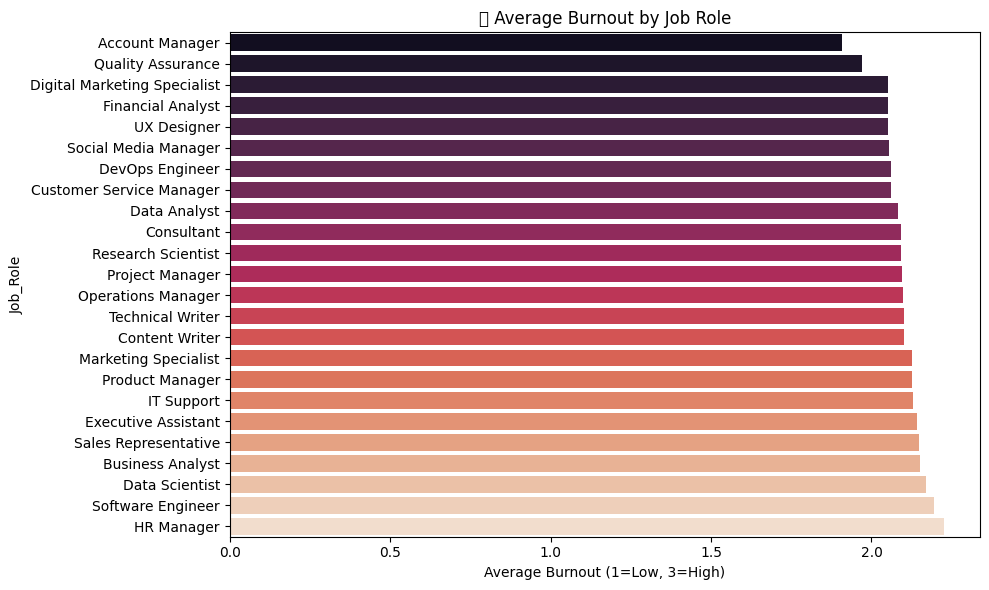

In [13]:
#A. Bar Plot – Burnout by Job Role
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
burnout_by_role = df.groupby("Job_Role")["Burnout_Level_Num"].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=burnout_by_role.values, y=burnout_by_role.index, palette="rocket")
plt.title("🔥 Average Burnout by Job Role")
plt.xlabel("Average Burnout (1=Low, 3=High)")
plt.tight_layout()
plt.show()


In [12]:
#C. Do People with Low Work-Life Balance Have High Burnout?
df[["Work_Life_Balance_Score", "Burnout_Level_Num"]].corr()


,Work_Life_Balance_Score,Burnout_Level_Num
Work_Life_Balance_Score,1.000000,-0.017843
Burnout_Level_Num,-0.017843,1.000000


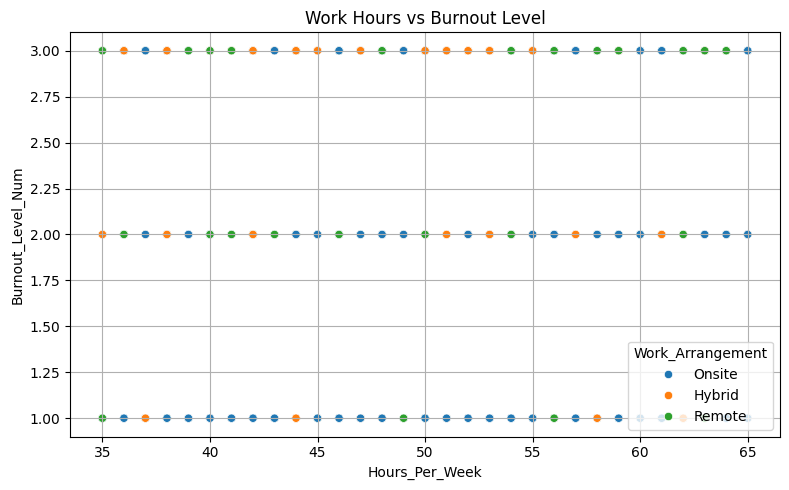

In [14]:
#B. 📈 Scatter plot: Hours vs Burnout
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Hours_Per_Week", y="Burnout_Level_Num", hue="Work_Arrangement")
plt.title("Work Hours vs Burnout Level")
plt.grid(True)
plt.tight_layout()
plt.show()
